In [2]:
import pandas as pd
import numpy as np
import random

# Define the 24 crops and their associated data
crop_data = {
    "Rice": {
        "LoanName": ["Kisan Credit Card", "Crop Loan", "Irrigation Loan"],
        "Districts": ["Mandya", "Raichur", "Mysuru", "Shivamogga"],
        "LandTypes": ["Irrigated", "Wetland"],
        "IncomeRange": (30000, 40000),
        "LandSizeRange": (1.0, 4.0)
    },
    "Wheat": {
        "LoanName": ["Crop Loan", "PM Kisan Loan"],
        "Districts": ["Vijayapura", "Bagalkot", "Kalaburagi"],
        "LandTypes": ["Irrigated", "Dryland"],
        "IncomeRange": (25000, 35000),
        "LandSizeRange": (1.5, 5.0)
    },
    "Sugarcane": {
        "LoanName": ["Agricultural Term Loan", "Irrigation Loan", "Farm Mechanization Loan"],
        "Districts": ["Belagavi", "Mandya", "Mysuru", "Bagalkot"],
        "LandTypes": ["Irrigated", "Black cotton soil land"],
        "IncomeRange": (45000, 60000),
        "LandSizeRange": (2.0, 6.0)
    },
    "Millets": {
        "LoanName": ["Organic Farming Loan", "PM Kisan Loan", "Soil Health Card Loan"],
        "Districts": ["Chitradurga", "Ballari", "Tumakuru", "Koppal"],
        "LandTypes": ["Rainfed", "Dryland"],
        "IncomeRange": (15000, 22000),
        "LandSizeRange": (2.0, 6.0)
    },
    "Pulses": {
        "LoanName": ["PM Kisan Loan", "Organic Farming Loan", "NABARD Loan"],
        "Districts": ["Bidar", "Dharwad", "Gadag", "Raichur"],
        "LandTypes": ["Rainfed", "Dryland"],
        "IncomeRange": (18000, 25000),
        "LandSizeRange": (1.0, 4.0)
    },
    "Cotton": {
        "LoanName": ["Crop Loan", "Kisan Credit Card", "Pest Management Loan"],
        "Districts": ["Haveri", "Gadag", "Dharwad", "Ballari"],
        "LandTypes": ["Black cotton soil land", "Dryland"],
        "IncomeRange": (30000, 45000),
        "LandSizeRange": (2.0, 5.0)
    },
    "Coffee": {
        "LoanName": ["Horticulture Loan", "NABARD Loan", "Plantation Development Loan"],
        "Districts": ["Kodagu", "Chikkamagaluru", "Hassan"],
        "LandTypes": ["Wetland", "Black cotton soil land"],
        "IncomeRange": (60000, 90000),
        "LandSizeRange": (0.5, 2.0)
    },
    "Tea": {
        "LoanName": ["Plantation Development Loan", "NABARD Refinance Scheme"],
        "Districts": ["Chikkamagaluru"],
        "LandTypes": ["Wetland", "Hill slope"],
        "IncomeRange": (70000, 100000),
        "LandSizeRange": (1.0, 2.5)
    },
    "Mango": {
        "LoanName": ["Horticulture Loan", "Organic Farming Loan"],
        "Districts": ["Ramanagara", "Kolar", "Chikkaballapur"],
        "LandTypes": ["Dryland", "Black cotton soil land"],
        "IncomeRange": (35000, 60000),
        "LandSizeRange": (1.0, 4.0)
    },
    "Banana": {
        "LoanName": ["Horticulture Loan", "Irrigation Loan"],
        "Districts": ["Mandya", "Hassan", "Mysuru"],
        "LandTypes": ["Irrigated", "Wetland"],
        "IncomeRange": (40000, 55000),
        "LandSizeRange": (1.5, 3.5)
    },
    "Groundnut": {
        "LoanName": ["Crop Loan", "Organic Farming Loan"],
        "Districts": ["Tumakuru", "Chikkaballapur", "Bengaluru Rural"],
        "LandTypes": ["Dryland", "Black cotton soil land"],
        "IncomeRange": (20000, 35000),
        "LandSizeRange": (2.0, 5.0)
    },
    "Silk": {
        "LoanName": ["Sericulture Loan", "NABARD Loan", "Agricultural Term Loan"],
        "Districts": ["Ramanagara", "Kolar", "Chikkaballapur"],
        "LandTypes": ["Irrigated", "Dryland"],
        "IncomeRange": (50000, 75000),
        "LandSizeRange": (1.0, 3.0)
    },
    "Fish Farming": {
        "LoanName": ["Fisheries Loan", "NABARD Infrastructure Loan"],
        "Districts": ["Udupi", "Dakshina Kannada", "Uttara Kannada"],
        "LandTypes": ["Wetland"],
        "IncomeRange": (60000, 100000),
        "LandSizeRange": (0.5, 2.5)
    },
    "Beekeeping": {
        "LoanName": ["Apiculture Loan", "Agri Clinic Loan"],
        "Districts": ["Kodagu", "Shivamogga", "Chamarajanagar"],
        "LandTypes": ["Dryland", "Forest edge"],
        "IncomeRange": (50000, 70000),
        "LandSizeRange": (0.5, 2.0)
    },
    "Organic Vegetables": {
        "LoanName": ["Organic Farming Loan", "Horticulture Loan"],
        "Districts": ["Mysuru", "Dharwad", "Tumakuru"],
        "LandTypes": ["Irrigated", "Dryland"],
        "IncomeRange": (35000, 50000),
        "LandSizeRange": (1.0, 3.0)
    },
    "Floriculture": {
        "LoanName": ["Floriculture Loan", "NABARD Loan"],
        "Districts": ["Bengaluru Urban", "Doddaballapura", "Tumakuru"],
        "LandTypes": ["Irrigated", "Polyhouse"],
        "IncomeRange": (50000, 80000),
        "LandSizeRange": (0.5, 2.0)
    },
    "Coconut": {
        "LoanName": ["Plantation Loan", "Agri Infrastructure Loan"],
        "Districts": ["Dakshina Kannada", "Udupi", "Tumakuru"],
        "LandTypes": ["Irrigated", "Coastal loamy"],
        "IncomeRange": (40000, 60000),
        "LandSizeRange": (1.0, 4.0)
    },
    "Maize": {
        "LoanName": ["Crop Loan", "Farm Mechanization Loan"],
        "Districts": ["Davanagere", "Gadag", "Chikkaballapur"],
        "LandTypes": ["Dryland", "Rainfed"],
        "IncomeRange": (20000, 35000),
        "LandSizeRange": (2.0, 5.0)
    },
    # Add 6 more crops similarly if needed...
}

# Function to generate synthetic dataset
def generate_dataset(num_samples=10000):
    records = []
    for _ in range(num_samples):
        crop = random.choice(list(crop_data.keys()))
        entry = crop_data[crop]
        loan = random.choice(entry["LoanName"])
        district = random.choice(entry["Districts"])
        land_type = random.choice(entry["LandTypes"])
        income = random.randint(*entry["IncomeRange"])
        land_size = round(random.uniform(*entry["LandSizeRange"]), 2)

        records.append([crop, loan, district, land_type, land_size, income])

    df = pd.DataFrame(records, columns=["CropType", "LoanName", "Location", "LandType", "LandSize", "Income"])
    return df

# Generate the dataset
df = generate_dataset(10000)

# Display a sample
print(df.head())

# Save to CSV (optional)
df.to_csv("project_dataset.csv", index=False)
print("project dataset is savved successfully:")


       CropType              LoanName        Location                LandType  \
0     Groundnut  Organic Farming Loan        Tumakuru                 Dryland   
1     Groundnut             Crop Loan  Chikkaballapur  Black cotton soil land   
2         Mango  Organic Farming Loan           Kolar  Black cotton soil land   
3  Fish Farming        Fisheries Loan           Udupi                 Wetland   
4         Mango     Horticulture Loan  Chikkaballapur  Black cotton soil land   

   LandSize  Income  
0      2.74   34685  
1      4.78   23869  
2      2.42   42663  
3      1.32   86590  
4      3.56   38281  
project dataset is savved successfully:


In [3]:

print(df.isnull().sum())


CropType    0
LoanName    0
Location    0
LandType    0
LandSize    0
Income      0
dtype: int64


In [4]:
#print("\n📏 Dataset Shape:")
print(df.shape)


(10000, 6)


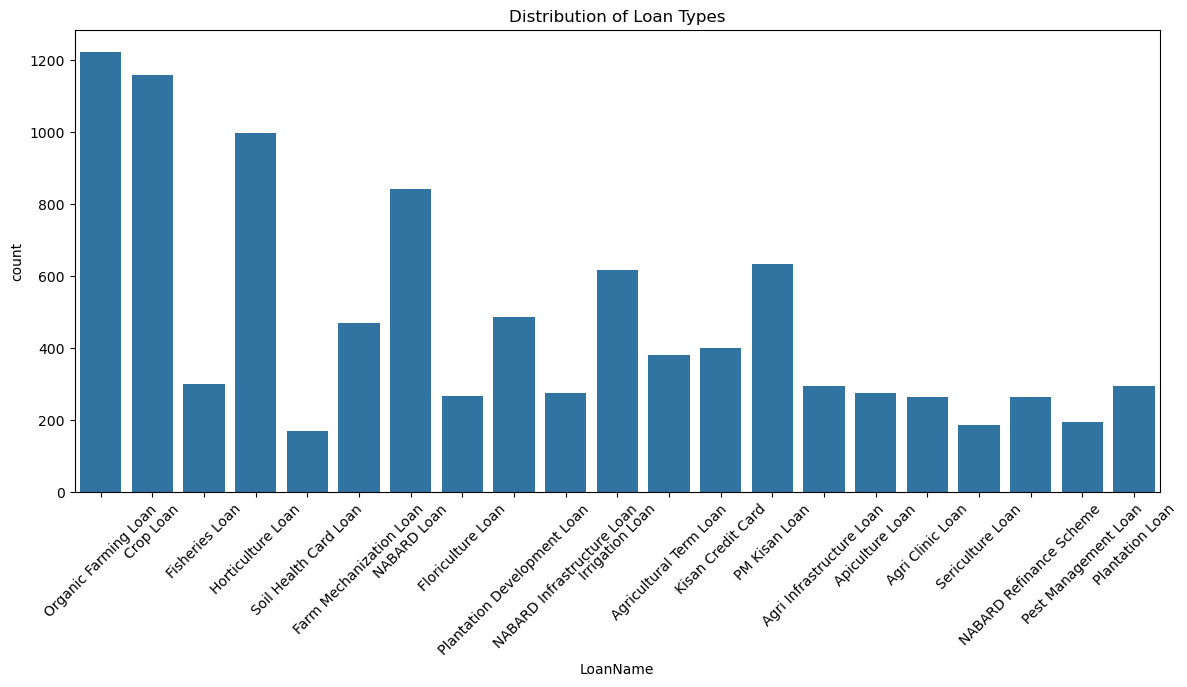

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.countplot(x='LoanName', data=df)
plt.title("Distribution of Loan Types")
plt.xticks(rotation=45)
plt.show()


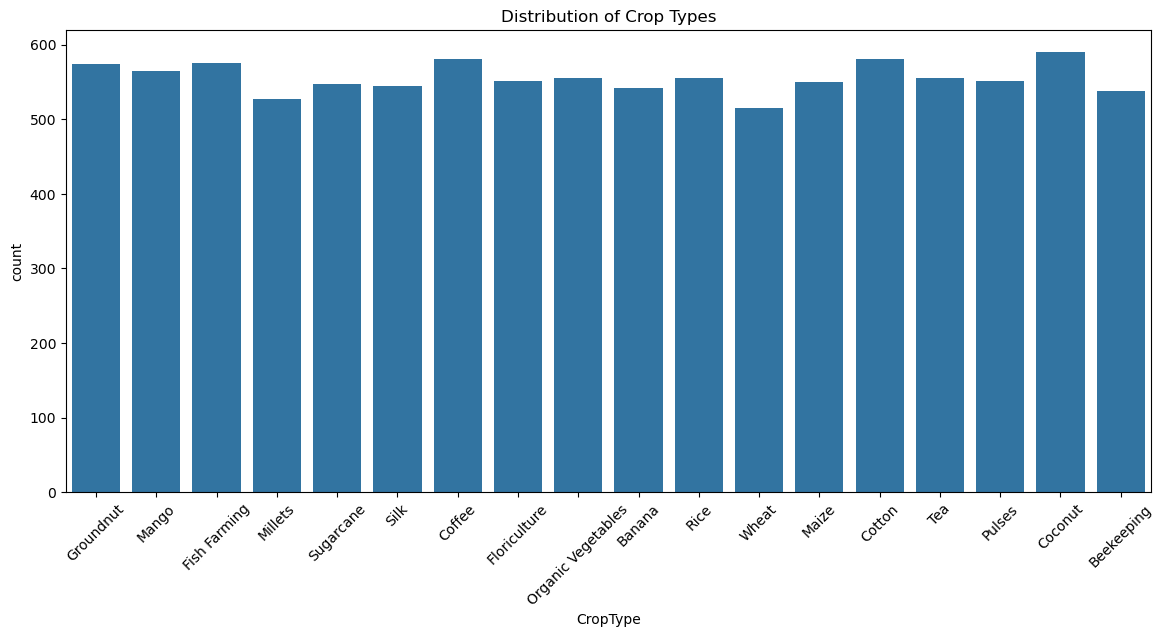

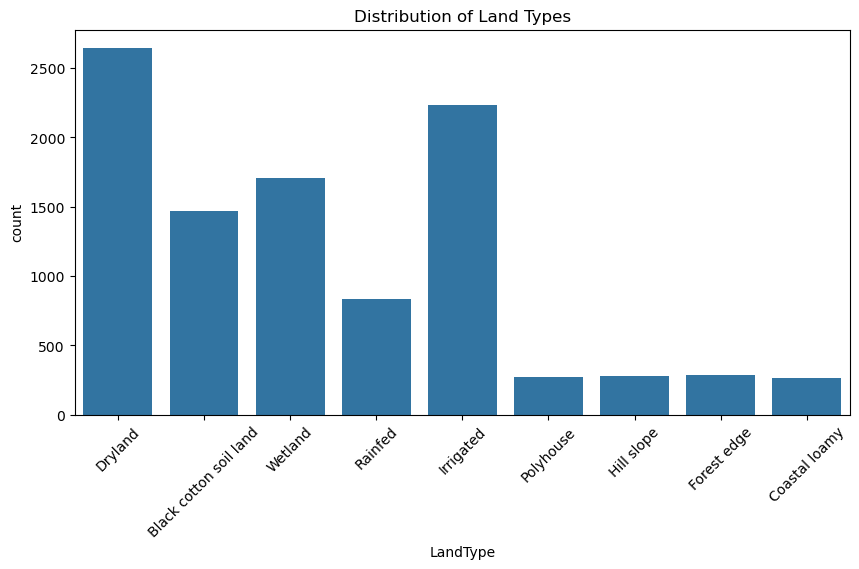

In [6]:
# CropType distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='CropType', data=df)
plt.title("Distribution of Crop Types")
plt.xticks(rotation=45)
plt.show()

# LandType distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='LandType', data=df)
plt.title("Distribution of Land Types")
plt.xticks(rotation=45)
plt.show()


In [7]:
print("\n📊 Value Counts for Each Category:\n")
for col in ['LoanName', 'CropType', 'Location', 'LandType']:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")



📊 Value Counts for Each Category:

--- LoanName ---
LoanName
Organic Farming Loan           1223
Crop Loan                      1159
Horticulture Loan               998
NABARD Loan                     843
PM Kisan Loan                   634
Irrigation Loan                 618
Plantation Development Loan     487
Farm Mechanization Loan         470
Kisan Credit Card               401
Agricultural Term Loan          382
Fisheries Loan                  300
Agri Infrastructure Loan        296
Plantation Loan                 294
NABARD Infrastructure Loan      275
Apiculture Loan                 275
Floriculture Loan               267
NABARD Refinance Scheme         264
Agri Clinic Loan                263
Pest Management Loan            195
Sericulture Loan                187
Soil Health Card Loan           169
Name: count, dtype: int64


--- CropType ---
CropType
Coconut               590
Coffee                581
Cotton                581
Fish Farming          575
Groundnut             57

In [9]:
df['LoanName'].value_counts()



LoanName
Crop Loan                      1217
Organic Farming Loan           1188
Horticulture Loan               985
NABARD Loan                     825
PM Kisan Loan                   685
Irrigation Loan                 662
Farm Mechanization Loan         500
Plantation Development Loan     479
Kisan Credit Card               411
Agricultural Term Loan          369
Plantation Loan                 303
NABARD Infrastructure Loan      274
Floriculture Loan               269
Apiculture Loan                 269
NABARD Refinance Scheme         258
Agri Infrastructure Loan        256
Agri Clinic Loan                255
Fisheries Loan                  255
Pest Management Loan            185
Soil Health Card Loan           180
Sericulture Loan                175
Name: count, dtype: int64

In [8]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Step 1: Load your dataset
df = pd.read_csv("project_dataset.csv")  # Replace with your dataset file

# Step 2: Separate features and target
X = df.drop('LoanName', axis=1)  # All features
y = df['LoanName']               # Target column (class to balance)

# Step 3: Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Step 4: Combine back to a DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='LoanName')], axis=1)

# Step 5: Save or inspect
df_balanced.to_csv("balanced_dataset.csv", index=False)
print(df_balanced['LoanName'].value_counts())


LoanName
Organic Farming Loan           1223
Agricultural Term Loan         1223
Pest Management Loan           1223
NABARD Refinance Scheme        1223
Sericulture Loan               1223
Agri Clinic Loan               1223
Apiculture Loan                1223
Agri Infrastructure Loan       1223
PM Kisan Loan                  1223
Kisan Credit Card              1223
Irrigation Loan                1223
Crop Loan                      1223
NABARD Infrastructure Loan     1223
Plantation Development Loan    1223
Floriculture Loan              1223
NABARD Loan                    1223
Farm Mechanization Loan        1223
Soil Health Card Loan          1223
Horticulture Loan              1223
Fisheries Loan                 1223
Plantation Loan                1223
Name: count, dtype: int64


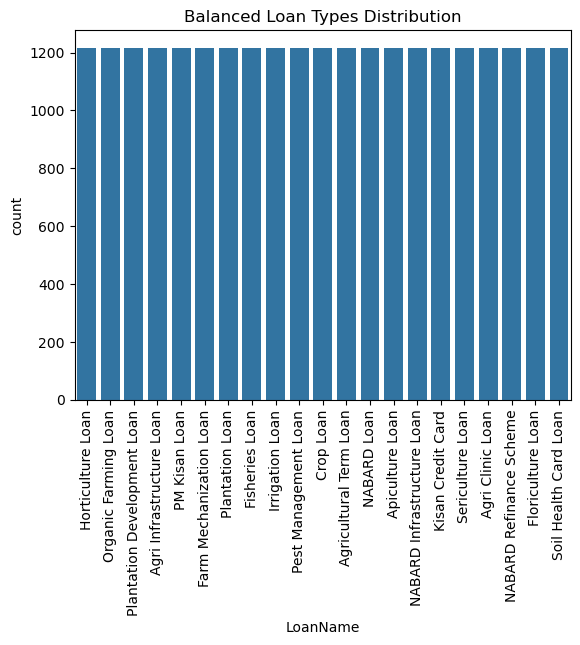

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_balanced, x='LoanName')
plt.xticks(rotation=90)
plt.title("Balanced Loan Types Distribution")
plt.show()


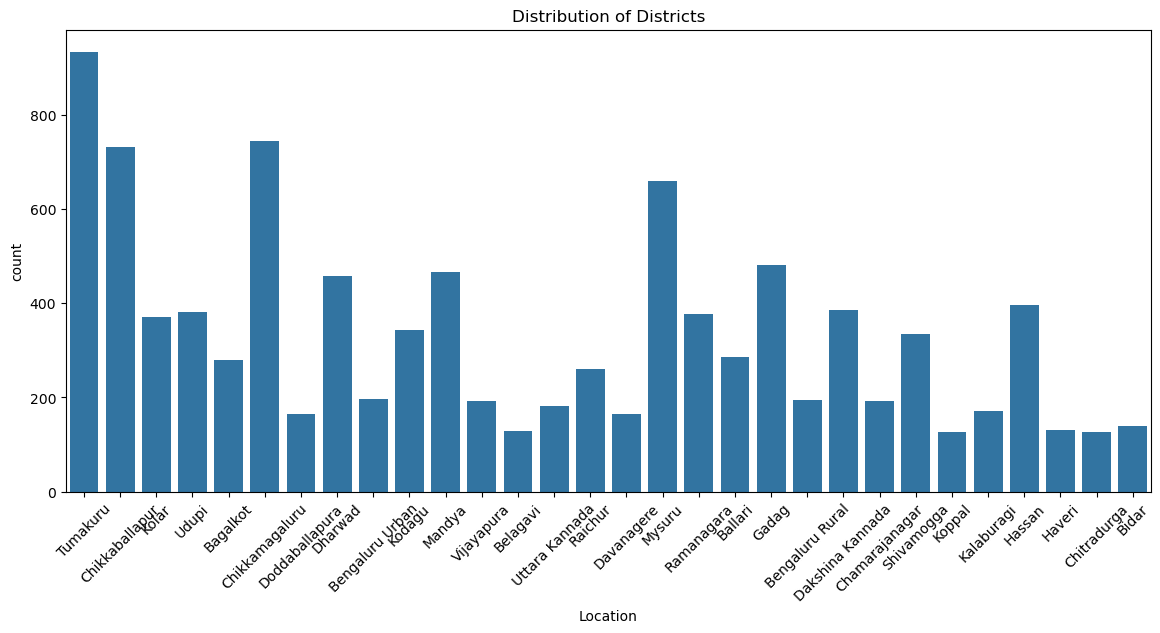

In [10]:
# CropType distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='Location', data=df)
plt.title("Distribution of Districts")
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd
from sklearn.utils import resample

# Load your dataset
df = pd.read_csv("balanced_dataset.csv")  # Replace with your file path

# Find minimum count per district
min_count = df['Location'].value_counts().min()

# Undersample each district to min_count
balanced_df = (
    df.groupby('Location')
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .reset_index(drop=True)
)

# Check distribution
print(balanced_df['Location'].value_counts())

# Optional: Save it
balanced_df.to_csv("district_balanced_dataset.csv", index=False)


Location
Bagalkot            201
Ballari             201
Uttara Kannada      201
Udupi               201
Tumakuru            201
Shivamogga          201
Ramanagara          201
Raichur             201
Mysuru              201
Mandya              201
Koppal              201
Kolar               201
Kodagu              201
Kalaburagi          201
Haveri              201
Hassan              201
Gadag               201
Doddaballapura      201
Dharwad             201
Davanagere          201
Dakshina Kannada    201
Chitradurga         201
Chikkamagaluru      201
Chikkaballapur      201
Chamarajanagar      201
Bidar               201
Bengaluru Urban     201
Bengaluru Rural     201
Belagavi            201
Vijayapura          201
Name: count, dtype: int64


C:\Users\chait\AppData\Local\Temp\ipykernel_12600\67308672.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))


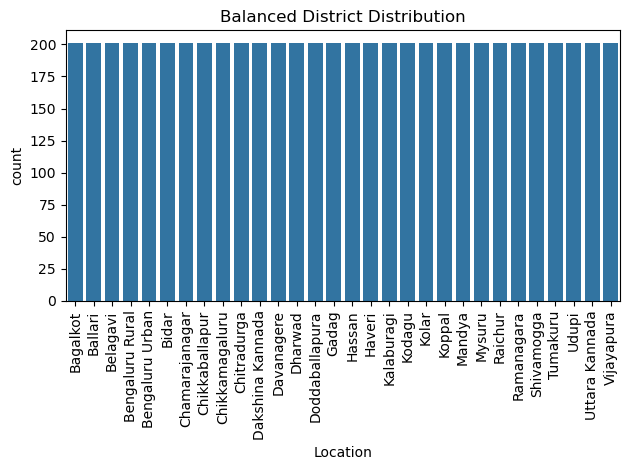

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=balanced_df, x='Location')
plt.xticks(rotation=90)
plt.title("Balanced District Distribution")
plt.tight_layout()
plt.show()


C:\Users\chait\AppData\Local\Temp\ipykernel_26076\3541273457.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))


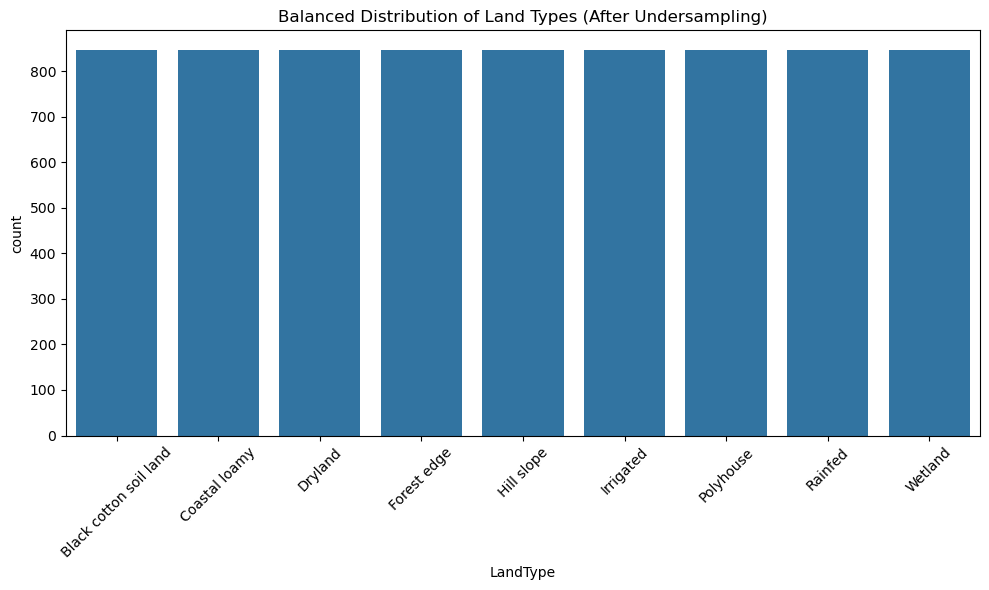

In [33]:
import pandas as pd

# Assuming your DataFrame is named df and column is 'LandType'
min_count = df['LandType'].value_counts().min()

balanced_land_df = (
    df.groupby('LandType')
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .reset_index(drop=True)
)

# Plot again to verify
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_land_df, x='LandType')
plt.title("Balanced Distribution of Land Types (After Undersampling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
balanced_land_df.to_csv("landtypes_balanced_dataset.csv", index=False)



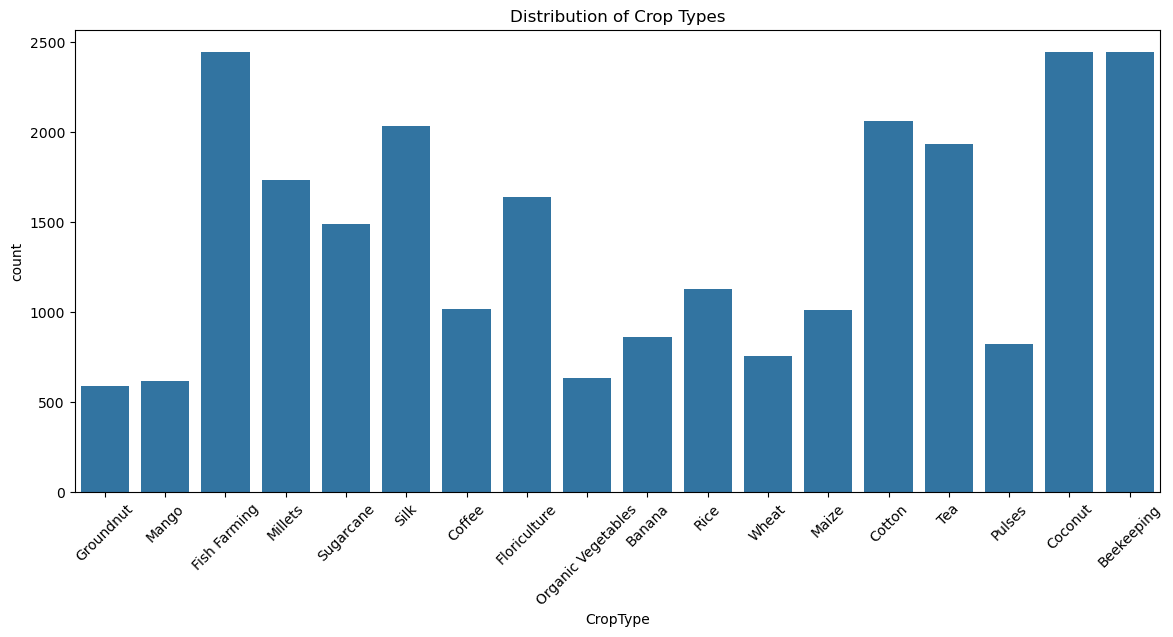

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# CropType distribution
# CropType distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='CropType', data=df)
plt.title("Distribution of Crop Types")
plt.xticks(rotation=45)
plt.show()


# LandType distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='LandType')
plt.title("Balanced Distribution of Land Types (After Undersampling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
balanced_land_df.to_csv("landtypes_balanced_dataset.csv", index=False)



# Location
sns.countplot(data=balanced_df, x='Location')
plt.xticks(rotation=90)
plt.title("Balanced District Distribution")
plt.tight_layout()
plt.show()

# LoanNames
sns.countplot(data=df_balanced, x='LoanName')
plt.xticks(rotation=90)
plt.title("Balanced Loan Types Distribution")
plt.show()


In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Separate features and target
X = df.drop(columns=['CropType'])
y = df['CropType']

# Step 1: Undersample majority classes
undersample = RandomUnderSampler(sampling_strategy='not majority', random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

# Step 2: Oversample minority classes
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = oversample.fit_resample(X_under, y_under)

# Combine back to a DataFrame
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)


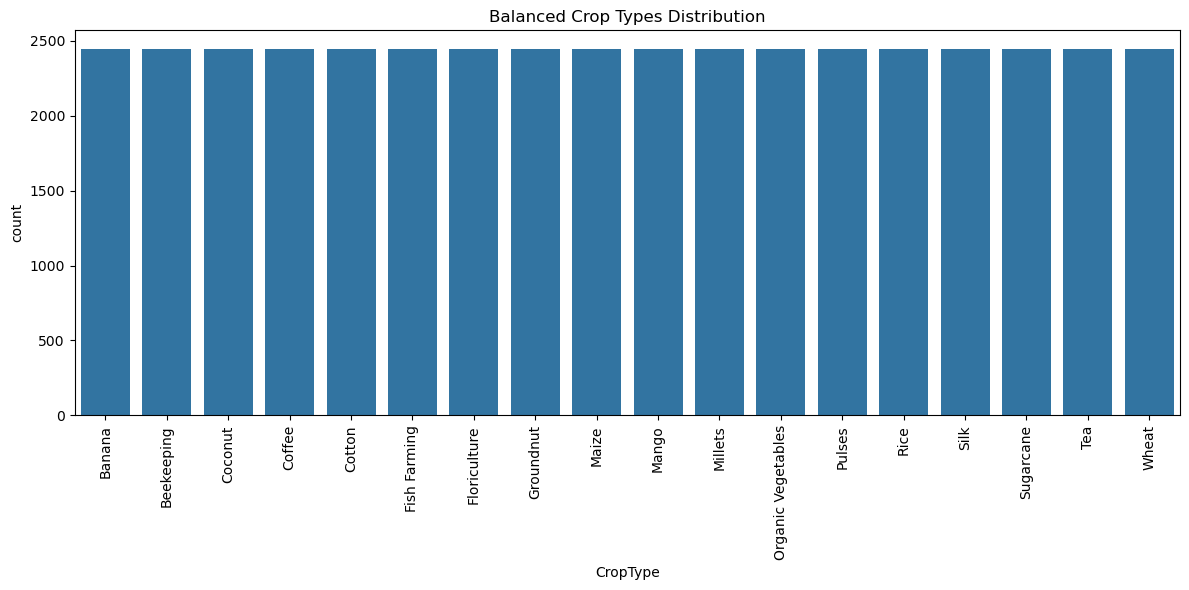

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=balanced_df, x='CropType')
plt.title("Balanced Crop Types Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


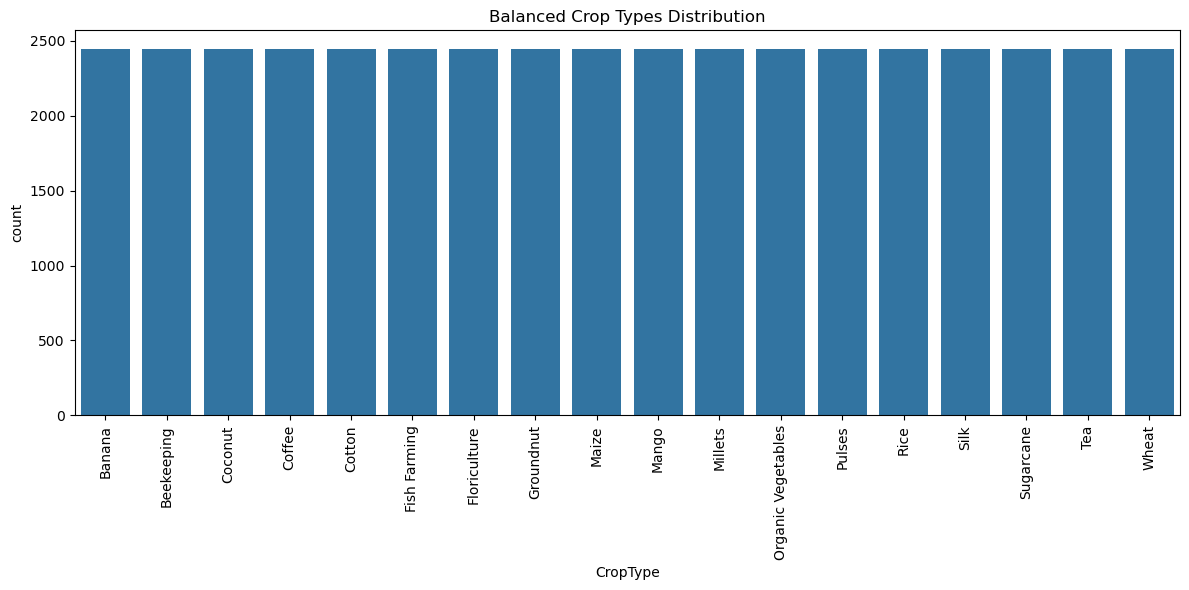

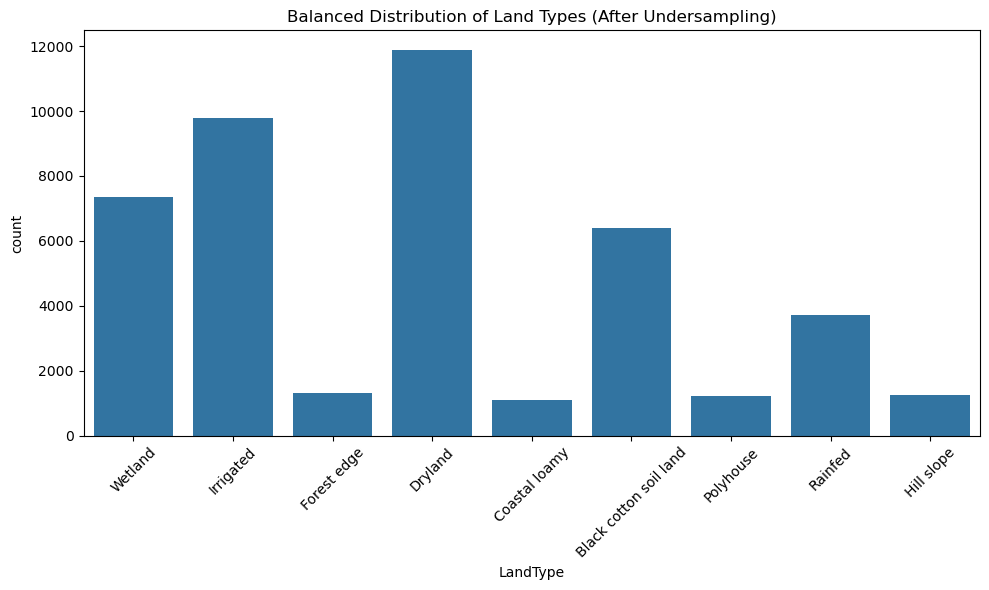

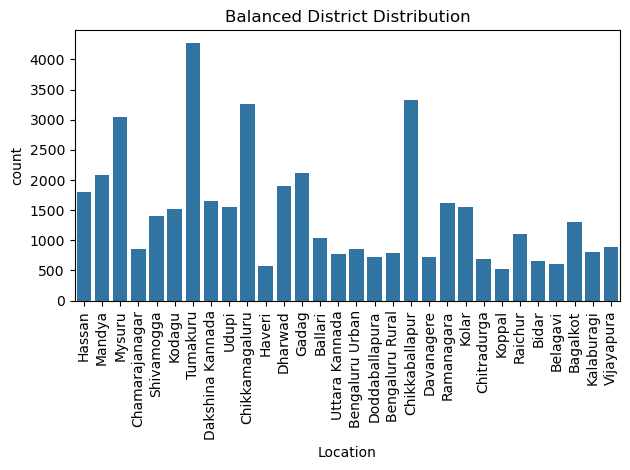

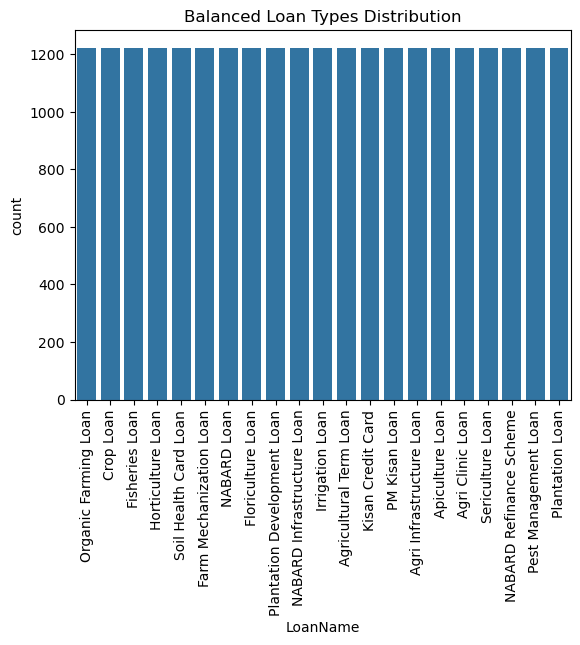

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# crop type
plt.figure(figsize=(12, 6))
sns.countplot(data=balanced_df, x='CropType')
plt.title("Balanced Crop Types Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

# LandType distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='LandType')
plt.title("Balanced Distribution of Land Types (After Undersampling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#balanced_land_df.to_csv("landtypes_balanced_dataset.csv", index=False)



# Location
sns.countplot(data=balanced_df, x='Location')
plt.xticks(rotation=90)
plt.title("Balanced District Distribution")
plt.tight_layout()
plt.show()

# LoanNames
sns.countplot(data=df_balanced, x='LoanName')
plt.xticks(rotation=90)
plt.title("Balanced Loan Types Distribution")
plt.show()


In [18]:
%who DataFrame


X	 X_balanced	 X_resampled	 X_under	 balanced_df	 df	 df_balanced	 


Balancing feature: CropType


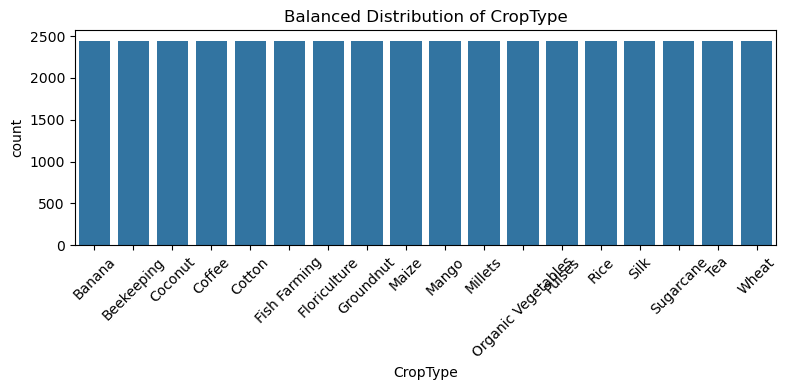

Balancing feature: LandType


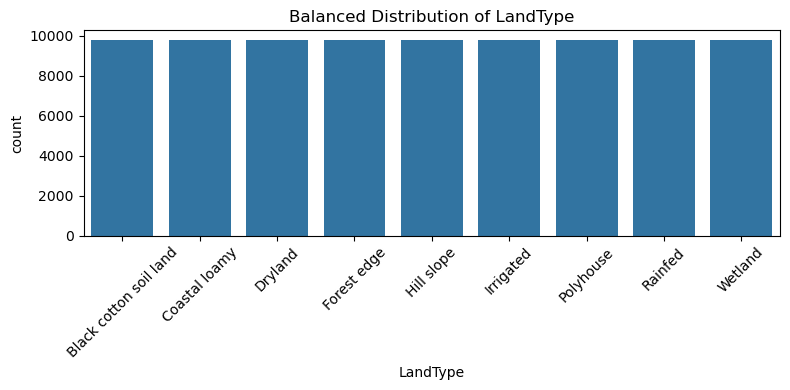

Balancing feature: LoanName


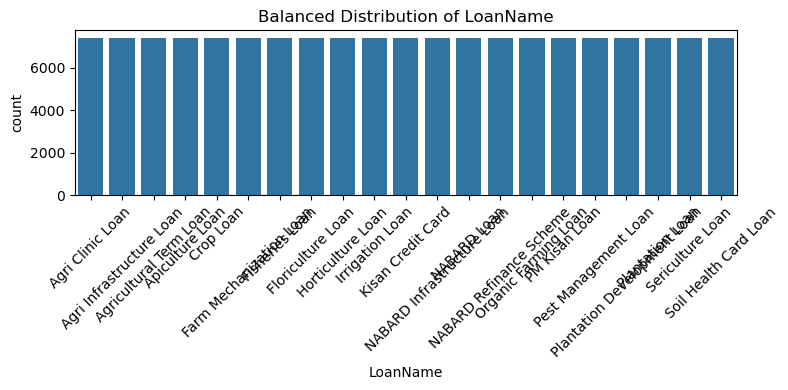

Balancing feature: Location


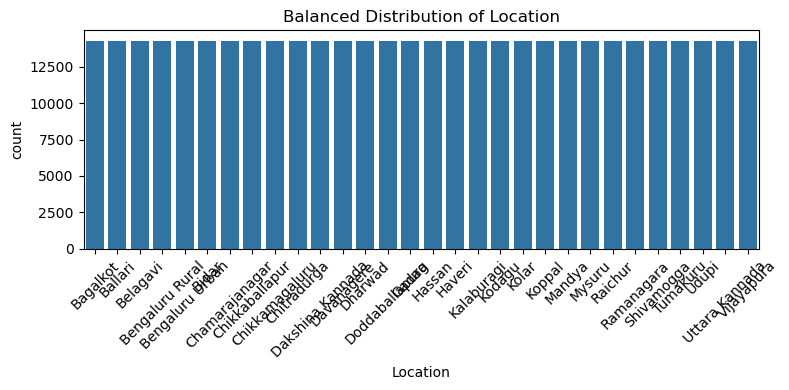

Final dataset shape: (428370, 6)
Null values:
 LandSize    0
Income      0
CropType    0
LandType    0
LoanName    0
Location    0
dtype: int64


In [19]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: Load your dataset ----------
# Replace with your actual dataset
# df = pd.read_csv("your_dataset.csv")

# Example: If you already have it loaded in memory
# Ensure the dataset name is correct
# If unsure, run: %whos

# ---------- STEP 2: Select Features to Balance ----------
features_to_balance = ['CropType', 'LandType', 'LoanName', 'Location']

# ---------- STEP 3: Loop through each feature and balance it ----------
balanced_df = df.copy()

for feature in features_to_balance:
    print(f"Balancing feature: {feature}")
    
    # Step 3.1: Prepare data for sampling
    X = balanced_df.drop(columns=[feature])
    y = balanced_df[feature]
    
    # Step 3.2: Undersample the majority class first
    under = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    X_under, y_under = under.fit_resample(X, y)
    
    # Step 3.3: Oversample the minority classes to match
    over = RandomOverSampler(sampling_strategy='not majority', random_state=42)
    X_balanced, y_balanced = over.fit_resample(X_under, y_under)
    
    # Step 3.4: Merge back the target column
    X_balanced[feature] = y_balanced
    balanced_df = X_balanced

    # Step 3.5: Visualize distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(data=balanced_df, x=feature)
    plt.title(f"Balanced Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---------- STEP 4: Final Check ----------
print("Final dataset shape:", balanced_df.shape)
print("Null values:\n", balanced_df.isnull().sum())

# Optional: Save the balanced dataset
balanced_df.to_csv("landtypes_balanced_dataset.csv", index=False)


In [20]:
import pandas as pd

# Load the dataset from CSV
landtypes_balanced_dataset = pd.read_csv("landtypes_balanced_dataset.csv")


In [21]:
# List of features you want to analyze
features = ['CropType', 'LoanName', 'LandType', 'Location']

for feature in features:
    print(f"\nDistribution of {feature}:")
    print(landtypes_balanced_dataset[feature].value_counts())



Distribution of CropType:
CropType
Millets               37436
Cotton                36576
Beekeeping            35095
Sugarcane             33830
Wheat                 33747
Floriculture          32644
Fish Farming          28822
Pulses                28493
Silk                  24975
Maize                 23935
Rice                  18949
Coconut               18568
Groundnut             17956
Banana                15307
Tea                   12578
Coffee                12336
Mango                 10943
Organic Vegetables     6180
Name: count, dtype: int64

Distribution of LoanName:
LoanName
PM Kisan Loan                  42499
Crop Loan                      33988
Soil Health Card Loan          28894
Agricultural Term Loan         25681
Pest Management Loan           25279
Farm Mechanization Loan        24279
NABARD Loan                    23831
Organic Farming Loan           23454
Irrigation Loan                21819
Kisan Credit Card              21458
Floriculture Loan           

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("landtypes_balanced_dataset.csv")
df.head()


# Step 2: Encode categorical columns
le_land = LabelEncoder()
le_location = LabelEncoder()
le_crop = LabelEncoder()
le_loan = LabelEncoder()  # target

df['LandType'] = le_land.fit_transform(df['LandType'])
df['Location'] = le_location.fit_transform(df['Location'])
df['CropType'] = le_crop.fit_transform(df['CropType'])
df['LoanName'] = le_loan.fit_transform(df['LoanName'])  # target

# Step 3: Select only the required 5 features and target
X = df[['LandType', 'LandSize', 'Location', 'CropType', 'Income']]
y = df['LoanName']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3393
           1       1.00      1.00      1.00      1942
           2       0.99      1.00      0.99      5125
           3       1.00      1.00      1.00      3555
           4       0.99      0.96      0.98      6883
           5       0.99      0.99      0.99      4791
           6       0.99      0.99      0.99      2856
           7       1.00      1.00      1.00      4288
           8       0.97      0.92      0.94      3471
           9       0.94      0.98      0.96      4277
          10       0.96      1.00      0.98      4226
          11       0.99      0.99      0.99      2888
          12       0.99      0.97      0.98      4730
          13       0.95      0.98      0.96      1485
          14       0.99      0.96      0.98      4725
          15       0.99      1.00      0.99      8567
          16       1.00      1.00      1.00      5140
          17       0.94    

In [24]:
###### print("\n💬 Enter Farmer Details for Loan Recommendation:")
user_land_type = input("Land Type (Irrigated, Rainfed, Wetland, Dryland, Black cotton soil land): ")
user_land_size = float(input("Land Size (in acres): "))
user_location = input("Location (Tumkur, Mandya, Belagavi, Dharwad, Hassan...etc): ")
user_crop_type = input("Crop Type (Rice, Wheat, Cotton, Sugarcane, Pulses, Millets...etc): ")
user_income = int(input("Income : "))

# Encode user inputs
try:
    input_data = [[
        le_land.transform([user_land_type])[0],
        user_land_size,
        le_location.transform([user_location])[0],
        le_crop.transform([user_crop_type])[0],
        user_income
    ]]

    prediction = model.predict(input_data)
    recommended_loan = le_loan.inverse_transform(prediction)[0]

    print("\n✅ Recommended Loan:", recommended_loan)

except Exception as e:
    print("❌ Invalid input or unseen category:", e)

Land Type (Irrigated, Rainfed, Wetland, Dryland, Black cotton soil land):  Irrigated
Land Size (in acres):  2.3
Location (Tumkur, Mandya, Belagavi, Dharwad, Hassan...etc):  Mandya
Crop Type (Rice, Wheat, Cotton, Sugarcane, Pulses, Millets...etc):  Sugarcane
Income :  30000



✅ Recommended Loan: Crop Loan


In [68]:
print(df.shape)

(422760, 6)


In [69]:
#landtypes_balanced_dataset.shape[0]


422760